## Houston Home Prices ML Times Series Model (Part 2)

This notebook is the second part of my ML Forecasting Time Series project predicting Houston home values. After I completed my ARIMA model, I wanted to investigate and research these three business questions to help me complete my EDA.


1. Is it better to invest in fast flips, under 1 year, or hold property for a few years to gain equity before selling?

2. What is the best areas in Houston to invest in?

3. Is it better to concentrate on investing in one particular area or allocate investing evenly throughout?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 
import pandas.util.testing as tm

C:\Users\heath\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('zillow_data.csv')
df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [3]:
filt = (df['Metro'] == 'Houston')
houston = df[filt]

In [4]:
houston

RegionID  RegionName          City State    Metro CountyName  SizeRank  \
2         91982       77494          Katy    TX  Houston     Harris         3   
5         91733       77084       Houston    TX  Houston     Harris         6   
8         91940       77449          Katy    TX  Houston     Harris         9   
22        92036       77573   League City    TX  Houston  Galveston        23   
23        92045       77584      Pearland    TX  Houston   Brazoria        24   
...         ...         ...           ...   ...      ...        ...       ...   
11091     91996       77514       Anahuac    TX  Houston   Chambers     11092   
11934     91699       77050       Houston    TX  Houston     Harris     11935   
12194     92078       77650  Port Bolivar    TX  Houston  Galveston     12195   
12497     92009       77534       Danbury    TX  Houston   Brazoria     12498   
14248     92039       77577     Liverpool    TX  Houston   Brazoria     14249   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
2      210400.0  212200.0  212200.0  ...   321000   320600   320200   320400   
5       95000.0   95200.0   95400.0  ...   157900   158700   160200   161900   
8       95400.0   95600.0   95800.0  ...   166800   167400   168400   169600   
22     141400.0  141000.0  140600.0  ...   249800   251300   252300   252400   
23     138500.0  138700.0  139200.0  ...   249100   249900   250500   250700   
...         ...       ...       ...  ...      ...      ...      ...      ...   
11091   51700.0   51900.0   52200.0  ...   130000   129700   129100   129200   
11934   49200.0   49500.0   49700.0  ...   104200   107000   109500   111200   
12194  131500.0  130800.0  130100.0  ...   225200   228300   230600   233100   
12497   74500.0   74900.0   75300.0  ...   165300   163500   162600   162500   
14248   60700.0   61100.0   61400.0  ...   155700   151300   147400   146500   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
2       320800   321200   321200   323000   326900   329900  
5       162800   162800   162800   162900   163500   164300  
8       170900   172300   173300   174200   175400   176200  
22      252300   253100   254700   257100   259800   261400  
23      251000   251400   251900   253200   255100   256500  
...        ...      ...      ...      ...      ...      ...  
11091   129900   130900   131600   133100   135000   136400  
11934   110800   110900   112900   114900   115400   115200  
12194   235600   238300   240300   243500   246400   247500  
12497   162400   162800   163000   162800   163500   164800  
14248   145900   145600   145000   145100   147300   149200  

[187 rows x 272 columns]

In the first few lines I am reloading, modifying, and filtering my data into the dataset I used in the previous modeling notebook.

Next, I am going to create a few more columns that will give me the ROI in a 1 year and a 5 year time period. I also found the difference in the home values in a 1 year and a 5 year spand as well. 

In [5]:
sum_column = houston["2018-04"] - houston["1996-04"]
houston["Final_Value"] = sum_column

In [6]:
sum_column = houston["Final_Value"] / houston["1996-04"] 
houston["ROI"] = sum_column

In [7]:
sum_column = houston["2018-04"] - houston["2013-04"]
houston["5yr_value"] = sum_column

In [8]:
sum_column = houston["5yr_value"] / houston["2013-04"] 
houston["ROI_5yr"] = sum_column

In [9]:
sum_column = houston["2018-04"] - houston["2017-04"]
houston["1yr_value"] = sum_column

In [10]:
sum_column = houston["1yr_value"] / houston["2017-04"] 
houston["ROI_1yr"] = sum_column

I want to investigate to see what time period brought in the highest returns. The ROI in 1 year was 6.3% and the ROI in 5 year is 43.3% 

In [11]:
houston['ROI_5yr'].mean()

0.4334036179285689

In [12]:
houston['ROI_1yr'].mean()

0.0638956595230806

In [13]:
houston

RegionID  RegionName          City State    Metro CountyName  SizeRank  \
2         91982       77494          Katy    TX  Houston     Harris         3   
5         91733       77084       Houston    TX  Houston     Harris         6   
8         91940       77449          Katy    TX  Houston     Harris         9   
22        92036       77573   League City    TX  Houston  Galveston        23   
23        92045       77584      Pearland    TX  Houston   Brazoria        24   
...         ...         ...           ...   ...      ...        ...       ...   
11091     91996       77514       Anahuac    TX  Houston   Chambers     11092   
11934     91699       77050       Houston    TX  Houston     Harris     11935   
12194     92078       77650  Port Bolivar    TX  Houston  Galveston     12195   
12497     92009       77534       Danbury    TX  Houston   Brazoria     12498   
14248     92039       77577     Liverpool    TX  Houston   Brazoria     14249   

        1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04  \
2      210400.0  212200.0  212200.0  ...   321200   323000   326900   329900   
5       95000.0   95200.0   95400.0  ...   162800   162900   163500   164300   
8       95400.0   95600.0   95800.0  ...   173300   174200   175400   176200   
22     141400.0  141000.0  140600.0  ...   254700   257100   259800   261400   
23     138500.0  138700.0  139200.0  ...   251900   253200   255100   256500   
...         ...       ...       ...  ...      ...      ...      ...      ...   
11091   51700.0   51900.0   52200.0  ...   131600   133100   135000   136400   
11934   49200.0   49500.0   49700.0  ...   112900   114900   115400   115200   
12194  131500.0  130800.0  130100.0  ...   240300   243500   246400   247500   
12497   74500.0   74900.0   75300.0  ...   163000   162800   163500   164800   
14248   60700.0   61100.0   61400.0  ...   145000   145100   147300   149200   

       Final_Value       ROI  5yr_value   ROI_5yr  1yr_value   ROI_1yr  
2         119500.0  0.567966    72800.0  0.283158       9900  0.030937  
5          69300.0  0.729474    50200.0  0.439965       6700  0.042513  
8          80800.0  0.846960    56900.0  0.476949       9400  0.056355  
22        120000.0  0.848656    74300.0  0.397114      15200  0.061738  
23        118000.0  0.851986    69400.0  0.370925       9800  0.039724  
...            ...       ...        ...       ...        ...       ...  
11091      84700.0  1.638298    35400.0  0.350495       6800  0.052469  
11934      66000.0  1.341463    42700.0  0.588966      17400  0.177914  
12194     116000.0  0.882129    57600.0  0.303318      32600  0.151698  
12497      90300.0  1.212081    40100.0  0.321572      -2100 -0.012582  
14248      88500.0  1.457990    48800.0  0.486056      -5600 -0.036176  

[187 rows x 278 columns]

I'm going to again melt and set my data to get a cumulative mean average of each home for the entire duration of years. This is condensed into one single column that now makes it easier to model. I am also going to convert my data back into datetime data as well.

In [14]:
def get_datetimes(h_town):
    return pd.to_datetime(houston.columns.values[1:], format='%Y-%m')

In [15]:
def melt_data(h_town):
    melted = pd.melt(houston, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Final_Value', 'ROI', '5yr_value', 'ROI_5yr', '1yr_value', 'ROI_1yr'  ], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [16]:
df2 = melt_data(df)
df2

RegionID  RegionName          City State    Metro CountyName  SizeRank  \
0         91982       77494          Katy    TX  Houston     Harris         3   
1         91733       77084       Houston    TX  Houston     Harris         6   
2         91940       77449          Katy    TX  Houston     Harris         9   
3         92036       77573   League City    TX  Houston  Galveston        23   
4         92045       77584      Pearland    TX  Houston   Brazoria        24   
...         ...         ...           ...   ...      ...        ...       ...   
49550     91996       77514       Anahuac    TX  Houston   Chambers     11092   
49551     91699       77050       Houston    TX  Houston     Harris     11935   
49552     92078       77650  Port Bolivar    TX  Houston  Galveston     12195   
49553     92009       77534       Danbury    TX  Houston   Brazoria     12498   
49554     92039       77577     Liverpool    TX  Houston   Brazoria     14249   

       Final_Value       ROI  5yr_value   ROI_5yr  1yr_value   ROI_1yr  \
0         119500.0  0.567966    72800.0  0.283158       9900  0.030937   
1          69300.0  0.729474    50200.0  0.439965       6700  0.042513   
2          80800.0  0.846960    56900.0  0.476949       9400  0.056355   
3         120000.0  0.848656    74300.0  0.397114      15200  0.061738   
4         118000.0  0.851986    69400.0  0.370925       9800  0.039724   
...            ...       ...        ...       ...        ...       ...   
49550      84700.0  1.638298    35400.0  0.350495       6800  0.052469   
49551      66000.0  1.341463    42700.0  0.588966      17400  0.177914   
49552     116000.0  0.882129    57600.0  0.303318      32600  0.151698   
49553      90300.0  1.212081    40100.0  0.321572      -2100 -0.012582   
49554      88500.0  1.457990    48800.0  0.486056      -5600 -0.036176   

            time     value  
0     1996-04-01  210400.0  
1     1996-04-01   95000.0  
2     1996-04-01   95400.0  
3     1996-04-01  141400.0  
4     1996-04-01  138500.0  
...          ...       ...  
49550 2018-04-01  136400.0  
49551 2018-04-01  115200.0  
49552 2018-04-01  247500.0  
49553 2018-04-01  164800.0  
49554 2018-04-01  149200.0  

[49555 rows x 15 columns]

In [17]:
from pandas_profiling import ProfileReport
profile = ProfileReport (df2, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

Now I want to isolate my data into a ROI of 10%+ a year. That is the normal measure of success for most investors, which mimics the S&P 500 average yearly returns. For my 1-year ROI data, I want to keep the homes with a 10% or more ROI and for my 5-year ROI data, I want to keep the homes with a 50%+ ROI. I am using 50% because that gives you an average of a 10% ROI each year. 

I then wanted to compare the ROI and the total increase in home value from my Houston data to the 50%+ ROI homes in the last 5 years. The homes with a 50%+ ROI averaged more than the Houston homes without that filter but I also wanted to compare this to the 1-year, 10%+ data as well to really compare the two.

In [18]:
filt = (houston['ROI_5yr'] >= 0.50)
ROI52 = houston[filt]
ROI52

RegionID  RegionName           City State    Metro  CountyName  \
44        91685       77036        Houston    TX  Houston      Harris   
405       91732       77083   Mission Bend    TX  Houston   Fort Bend   
944       91721       77072        Houston    TX  Houston      Harris   
1028      91664       77015        Houston    TX  Houston      Harris   
1270      91737       77088        Houston    TX  Houston      Harris   
1317      91748       77099        Houston    TX  Houston      Harris   
1427      91653       77004        Houston    TX  Houston      Harris   
1493      91729       77080        Houston    TX  Houston      Harris   
1802      91709       77060        Houston    TX  Houston      Harris   
2002      91961       77471      Rosenberg    TX  Houston   Fort Bend   
2197      91741       77092        Houston    TX  Houston      Harris   
2219      91723       77074        Houston    TX  Houston      Harris   
2378      92002       77520        Baytown    TX  Houston      Harris   
2643      91683       77034        Houston    TX  Houston      Harris   
2901      92020       77550      Galveston    TX  Houston   Galveston   
3056      91724       77075        Houston    TX  Houston      Harris   
3129      91978       77489  Missouri City    TX  Houston   Fort Bend   
3290      91986       77502       Pasadena    TX  Houston      Harris   
3378      92050       77590     Texas City    TX  Houston   Galveston   
3380      91667       77018        Houston    TX  Houston      Harris   
3571      91990       77506       Pasadena    TX  Houston      Harris   
3636      91736       77087        Houston    TX  Houston      Harris   
3648      91670       77021        Houston    TX  Houston      Harris   
4127      91666       77017        Houston    TX  Houston      Harris   
4144      91716       77067        Houston    TX  Houston      Harris   
4182      92005       77530    Channelview    TX  Houston      Harris   
4198      91720       77071        Houston    TX  Houston      Harris   
4319      91665       77016        Houston    TX  Houston      Harris   
4468      91694       77045        Houston    TX  Houston      Harris   
4654      91692       77043        Houston    TX  Houston      Harris   
4876      91710       77061        Houston    TX  Houston      Harris   
5130      91669       77020        Houston    TX  Houston      Harris   
5260      91987       77503       Pasadena    TX  Houston      Harris   
5293      91687       77038        Houston    TX  Houston      Harris   
5478      91735       77086        Houston    TX  Houston      Harris   
5617      92016       77545         Fresno    TX  Houston   Fort Bend   
5847      91688       77039         Aldine    TX  Houston      Harris   
6110      92033       77568      La Marque    TX  Houston   Galveston   
6457      92014       77541       Freeport    TX  Houston    Brazoria   
6611      91888       77378         Willis    TX  Houston  Montgomery   
6703      91700       77051        Houston    TX  Houston      Harris   
6792      91662       77013        Houston    TX  Houston      Harris   
7401      92048       77587  South Houston    TX  Houston      Harris   
7469      91734       77085        Houston    TX  Houston      Harris   
7489      91652       77003        Houston    TX  Houston      Harris   
8121      92000       77518        Bacliff    TX  Houston   Galveston   
8230      91681       77032        Houston    TX  Houston      Harris   
8515      92031       77565    League City    TX  Houston   Galveston   
10208     91999       77517       Santa Fe    TX  Houston   Galveston   
11934     91699       77050        Houston    TX  Houston      Harris   

       SizeRank   1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  \
44           45  120400.0  118700.0  117300.0  ...   177700   179800   185100   
405         406   89700.0   89700.0   89600.0  ...   158300   160200   162600   
944         945   65900.0   65900.0   65

In [19]:
ROI52['ROI_5yr'].mean()

0.5768661490867217

In [20]:
houston['ROI_5yr'].mean()

0.4334036179285689

In [21]:
ROI52['5yr_value'].mean()

59024.0

In [22]:
houston['5yr_value'].mean()

66807.48663101604

In [23]:
#profile2 = ProfileReport (ROI5, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#profile2

In [24]:
ROI52['CountyName'].value_counts()

Harris        38
Galveston      6
Fort Bend      4
Montgomery     1
Brazoria       1
Name: CountyName, dtype: int64

Now I am going to look a little more into Harris county specifically since the majority of the homes are in this area. I want to investigate to see if there is a difference in profits if you invest in one particular area. 

In [25]:
filt = (ROI52['CountyName'] == 'Harris')
harris = ROI52[filt]
harris

RegionID  RegionName           City State    Metro CountyName  \
44        91685       77036        Houston    TX  Houston     Harris   
944       91721       77072        Houston    TX  Houston     Harris   
1028      91664       77015        Houston    TX  Houston     Harris   
1270      91737       77088        Houston    TX  Houston     Harris   
1317      91748       77099        Houston    TX  Houston     Harris   
1427      91653       77004        Houston    TX  Houston     Harris   
1493      91729       77080        Houston    TX  Houston     Harris   
1802      91709       77060        Houston    TX  Houston     Harris   
2197      91741       77092        Houston    TX  Houston     Harris   
2219      91723       77074        Houston    TX  Houston     Harris   
2378      92002       77520        Baytown    TX  Houston     Harris   
2643      91683       77034        Houston    TX  Houston     Harris   
3056      91724       77075        Houston    TX  Houston     Harris   
3290      91986       77502       Pasadena    TX  Houston     Harris   
3380      91667       77018        Houston    TX  Houston     Harris   
3571      91990       77506       Pasadena    TX  Houston     Harris   
3636      91736       77087        Houston    TX  Houston     Harris   
3648      91670       77021        Houston    TX  Houston     Harris   
4127      91666       77017        Houston    TX  Houston     Harris   
4144      91716       77067        Houston    TX  Houston     Harris   
4182      92005       77530    Channelview    TX  Houston     Harris   
4198      91720       77071        Houston    TX  Houston     Harris   
4319      91665       77016        Houston    TX  Houston     Harris   
4468      91694       77045        Houston    TX  Houston     Harris   
4654      91692       77043        Houston    TX  Houston     Harris   
4876      91710       77061        Houston    TX  Houston     Harris   
5130      91669       77020        Houston    TX  Houston     Harris   
5260      91987       77503       Pasadena    TX  Houston     Harris   
5293      91687       77038        Houston    TX  Houston     Harris   
5478      91735       77086        Houston    TX  Houston     Harris   
5847      91688       77039         Aldine    TX  Houston     Harris   
6703      91700       77051        Houston    TX  Houston     Harris   
6792      91662       77013        Houston    TX  Houston     Harris   
7401      92048       77587  South Houston    TX  Houston     Harris   
7469      91734       77085        Houston    TX  Houston     Harris   
7489      91652       77003        Houston    TX  Houston     Harris   
8230      91681       77032        Houston    TX  Houston     Harris   
11934     91699       77050        Houston    TX  Houston     Harris   

       SizeRank   1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  \
44           45  120400.0  118700.0  117300.0  ...   177700   179800   185100   
944         945   65900.0   65900.0   65900.0  ...   125700   126600   129600   
1028       1029   66100.0   66100.0   66200.0  ...   130400   131400   133000   
1270       1271   69200.0   69300.0   69400.0  ...   128100   129000   129600   
1317       1318   72100.0   72100.0   72200.0  ...   132400   134000   137400   
1427       1428  136700.0  136300.0  136000.0  ...   299400   300800   304000   
1493       1494  107400.0  106100.0  105100.0  ...   250100   251900   253900   
1802       1803   57700.0   57800.0   57800.0  ...   121500   121700   122400   
2197       2198   95600.0   96900.0   98400.0  ...   246900   247300   248100   
2219       2220   72600.0   72500.0   72500.0  ...   171400   173100   173500   
2378       2379   50800.0   50600.0   50500.0  ...   111600   113200   114300   
2643       2644   71900.0   71800.0   71800.0  ...   141000   141600   142300   
3056       3057   85100.0   84800.0   84500.0  ...   165100   165900   166800   
3290       3291   63800.0   63900.0   63900.0  ...   133600   13

In [26]:
harris['ROI_5yr'].mean()

0.5757643028188687

In [27]:
harris['5yr_value'].mean()

58271.05263157895

Now I am going to do the same thing that I did with my 5-year data with my 1-year data so I can compare and determine which option was the best way to go.

In [28]:
filt = (houston['ROI_1yr'] >= 0.10)
ROI1 = houston[filt]
ROI1

RegionID  RegionName          City State    Metro CountyName  SizeRank  \
405       91732       77083  Mission Bend    TX  Houston  Fort Bend       406   
1317      91748       77099       Houston    TX  Houston     Harris      1318   
2219      91723       77074       Houston    TX  Houston     Harris      2220   
2378      92002       77520       Baytown    TX  Houston     Harris      2379   
2443      92034       77571      La Porte    TX  Houston     Harris      2444   
2660      91742       77093       Houston    TX  Houston     Harris      2661   
2901      92020       77550     Galveston    TX  Houston  Galveston      2902   
3056      91724       77075       Houston    TX  Houston     Harris      3057   
3290      91986       77502      Pasadena    TX  Houston     Harris      3291   
3378      92050       77590    Texas City    TX  Houston  Galveston      3379   
3571      91990       77506      Pasadena    TX  Houston     Harris      3572   
3636      91736       77087       Houston    TX  Houston     Harris      3637   
3648      91670       77021       Houston    TX  Houston     Harris      3649   
4127      91666       77017       Houston    TX  Houston     Harris      4128   
4182      92005       77530   Channelview    TX  Houston     Harris      4183   
4198      91720       77071       Houston    TX  Houston     Harris      4199   
4319      91665       77016       Houston    TX  Houston     Harris      4320   
4393      92021       77551     Galveston    TX  Houston  Galveston      4394   
4468      91694       77045       Houston    TX  Houston     Harris      4469   
4512      91707       77058       Houston    TX  Houston     Harris      4513   
4632      91747       77098       Houston    TX  Houston     Harris      4633   
4876      91710       77061       Houston    TX  Houston     Harris      4877   
5130      91669       77020       Houston    TX  Houston     Harris      5131   
5847      91688       77039        Aldine    TX  Houston     Harris      5848   
6457      92014       77541      Freeport    TX  Houston   Brazoria      6458   
6703      91700       77051       Houston    TX  Houston     Harris      6704   
6775      92051       77591    Texas City    TX  Houston  Galveston      6776   
6904      92024       77554     Galveston    TX  Houston  Galveston      6905   
6973      91678       77029       Houston    TX  Houston     Harris      6974   
7022      91651       77002       Houston    TX  Houston     Harris      7023   
7469      91734       77085       Houston    TX  Houston     Harris      7470   
7892      91727       77078       Houston    TX  Houston     Harris      7893   
8121      92000       77518       Bacliff    TX  Houston  Galveston      8122   
8138      92028       77562     Highlands    TX  Houston     Harris      8139   
8230      91681       77032       Houston    TX  Houston     Harris      8231   
9578      92089       77665        Winnie    TX  Houston   Chambers      9579   
10208     91999       77517      Santa Fe    TX  Houston  Galveston     10209   
11934     91699       77050       Houston    TX  Houston     Harris     11935   
12194     92078       77650  Port Bolivar    TX  Houston  Galveston     12195   

        1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04  \
405     89700.0   89700.0   89600.0  ...   158300   160200   162600   164500   
1317    72100.0   72100.0   72200.0  ...   132400   134000   137400   140100   
2219    72600.0   72500.0   72500.0  ...   171400   173100   173500   173200   
2378    50800.0   50600.0   50500.0  ...   111600   113200   114300   114700   
2443    85500.0   85600.0   85800.0  ...   171800   173100   174100   174500   
2660    43200.0   43200.0   43300.0  ...    96400    98000   100100   101900   
2901    70100.0   70300.0   70600.0  ...   167900   171700   176500   179600   
3056    85100.0   84800.0   84500.0  ...   165100   165900   166800   167200   
3290    63800.0   63900.0   63900.0  ...   133

In [29]:
#profile3 = ProfileReport (ROI1, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#profile3

In [30]:
ROI1['ROI_1yr'].mean()

0.1372848376596611

In [31]:
ROI1['1yr_value'].mean()

19223.076923076922

In [32]:
ROI1['CountyName'].value_counts()

Harris       28
Galveston     8
Fort Bend     1
Chambers      1
Brazoria      1
Name: CountyName, dtype: int64

In [33]:
ROI1

RegionID  RegionName          City State    Metro CountyName  SizeRank  \
405       91732       77083  Mission Bend    TX  Houston  Fort Bend       406   
1317      91748       77099       Houston    TX  Houston     Harris      1318   
2219      91723       77074       Houston    TX  Houston     Harris      2220   
2378      92002       77520       Baytown    TX  Houston     Harris      2379   
2443      92034       77571      La Porte    TX  Houston     Harris      2444   
2660      91742       77093       Houston    TX  Houston     Harris      2661   
2901      92020       77550     Galveston    TX  Houston  Galveston      2902   
3056      91724       77075       Houston    TX  Houston     Harris      3057   
3290      91986       77502      Pasadena    TX  Houston     Harris      3291   
3378      92050       77590    Texas City    TX  Houston  Galveston      3379   
3571      91990       77506      Pasadena    TX  Houston     Harris      3572   
3636      91736       77087       Houston    TX  Houston     Harris      3637   
3648      91670       77021       Houston    TX  Houston     Harris      3649   
4127      91666       77017       Houston    TX  Houston     Harris      4128   
4182      92005       77530   Channelview    TX  Houston     Harris      4183   
4198      91720       77071       Houston    TX  Houston     Harris      4199   
4319      91665       77016       Houston    TX  Houston     Harris      4320   
4393      92021       77551     Galveston    TX  Houston  Galveston      4394   
4468      91694       77045       Houston    TX  Houston     Harris      4469   
4512      91707       77058       Houston    TX  Houston     Harris      4513   
4632      91747       77098       Houston    TX  Houston     Harris      4633   
4876      91710       77061       Houston    TX  Houston     Harris      4877   
5130      91669       77020       Houston    TX  Houston     Harris      5131   
5847      91688       77039        Aldine    TX  Houston     Harris      5848   
6457      92014       77541      Freeport    TX  Houston   Brazoria      6458   
6703      91700       77051       Houston    TX  Houston     Harris      6704   
6775      92051       77591    Texas City    TX  Houston  Galveston      6776   
6904      92024       77554     Galveston    TX  Houston  Galveston      6905   
6973      91678       77029       Houston    TX  Houston     Harris      6974   
7022      91651       77002       Houston    TX  Houston     Harris      7023   
7469      91734       77085       Houston    TX  Houston     Harris      7470   
7892      91727       77078       Houston    TX  Houston     Harris      7893   
8121      92000       77518       Bacliff    TX  Houston  Galveston      8122   
8138      92028       77562     Highlands    TX  Houston     Harris      8139   
8230      91681       77032       Houston    TX  Houston     Harris      8231   
9578      92089       77665        Winnie    TX  Houston   Chambers      9579   
10208     91999       77517      Santa Fe    TX  Houston  Galveston     10209   
11934     91699       77050       Houston    TX  Houston     Harris     11935   
12194     92078       77650  Port Bolivar    TX  Houston  Galveston     12195   

        1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04  \
405     89700.0   89700.0   89600.0  ...   158300   160200   162600   164500   
1317    72100.0   72100.0   72200.0  ...   132400   134000   137400   140100   
2219    72600.0   72500.0   72500.0  ...   171400   173100   173500   173200   
2378    50800.0   50600.0   50500.0  ...   111600   113200   114300   114700   
2443    85500.0   85600.0   85800.0  ...   171800   173100   174100   174500   
2660    43200.0   43200.0   43300.0  ...    96400    98000   100100   101900   
2901    70100.0   70300.0   70600.0  ...   167900   171700   176500   179600   
3056    85100.0   84800.0   84500.0  ...   165100   165900   166800   167200   
3290    63800.0   63900.0   63900.0  ...   133

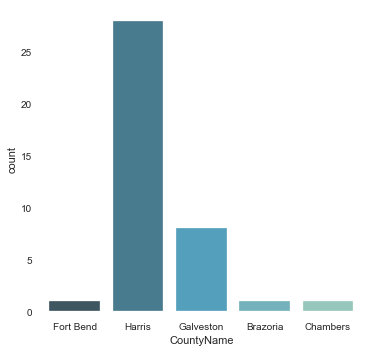

In [34]:
sns.catplot(x="CountyName", kind="count", palette="GnBu_d", data=ROI1);

In [35]:
filt = (ROI1['CountyName'] == 'Harris')
harris2 = ROI1[filt]
harris2

RegionID  RegionName         City State    Metro CountyName  SizeRank  \
1317      91748       77099      Houston    TX  Houston     Harris      1318   
2219      91723       77074      Houston    TX  Houston     Harris      2220   
2378      92002       77520      Baytown    TX  Houston     Harris      2379   
2443      92034       77571     La Porte    TX  Houston     Harris      2444   
2660      91742       77093      Houston    TX  Houston     Harris      2661   
3056      91724       77075      Houston    TX  Houston     Harris      3057   
3290      91986       77502     Pasadena    TX  Houston     Harris      3291   
3571      91990       77506     Pasadena    TX  Houston     Harris      3572   
3636      91736       77087      Houston    TX  Houston     Harris      3637   
3648      91670       77021      Houston    TX  Houston     Harris      3649   
4127      91666       77017      Houston    TX  Houston     Harris      4128   
4182      92005       77530  Channelview    TX  Houston     Harris      4183   
4198      91720       77071      Houston    TX  Houston     Harris      4199   
4319      91665       77016      Houston    TX  Houston     Harris      4320   
4468      91694       77045      Houston    TX  Houston     Harris      4469   
4512      91707       77058      Houston    TX  Houston     Harris      4513   
4632      91747       77098      Houston    TX  Houston     Harris      4633   
4876      91710       77061      Houston    TX  Houston     Harris      4877   
5130      91669       77020      Houston    TX  Houston     Harris      5131   
5847      91688       77039       Aldine    TX  Houston     Harris      5848   
6703      91700       77051      Houston    TX  Houston     Harris      6704   
6973      91678       77029      Houston    TX  Houston     Harris      6974   
7022      91651       77002      Houston    TX  Houston     Harris      7023   
7469      91734       77085      Houston    TX  Houston     Harris      7470   
7892      91727       77078      Houston    TX  Houston     Harris      7893   
8138      92028       77562    Highlands    TX  Houston     Harris      8139   
8230      91681       77032      Houston    TX  Houston     Harris      8231   
11934     91699       77050      Houston    TX  Houston     Harris     11935   

        1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04  \
1317    72100.0   72100.0   72200.0  ...   132400   134000   137400   140100   
2219    72600.0   72500.0   72500.0  ...   171400   173100   173500   173200   
2378    50800.0   50600.0   50500.0  ...   111600   113200   114300   114700   
2443    85500.0   85600.0   85800.0  ...   171800   173100   174100   174500   
2660    43200.0   43200.0   43300.0  ...    96400    98000   100100   101900   
3056    85100.0   84800.0   84500.0  ...   165100   165900   166800   167200   
3290    63800.0   63900.0   63900.0  ...   133600   134600   135900   137100   
3571    48200.0   48200.0   48200.0  ...   104700   105900   107200   108700   
3636    54700.0   54600.0   54500.0  ...   127800   128000   128100   128300   
3648    45500.0   45200.0   44900.0  ...   118600   120800   123200   124700   
4127    55700.0   55700.0   55800.0  ...   116800   117500   119000   120600   
4182    65300.0   65400.0   65500.0  ...   136900   138600   140300   141300   
4198    88400.0   88200.0   88100.0  ...   160800   161700   162800   163800   
4319    42600.0   42600.0   42600.0  ...    96200    97700    99200   101000   
4468    55700.0   55700.0   55700.0  ...   117700   118000   117500   117700   
4512   127900.0  128100.0  128200.0  ...   218300   219800   222400   224100   
4632   417600.0  421100.0  424700.0  ...   597700   606500   615000   620700   
4876    76500.0   76700.0   76900.0  ...   161300   162200   163600   164100   
5130    39300.0   39300.0   39300.0  ...    97800    99200   101200   103800   
5847    56200.0   56300.0   56300.0  ...   120400   120900   120500   120600   
6703  

In [36]:
harris2['ROI_1yr'].mean()

0.13911030341246863

In [37]:
houston['ROI_5yr'].mean()

0.4334036179285689

In [38]:
harris2['1yr_value'].mean()

18460.714285714286

In [39]:
houston['5yr_value'].mean()

66807.48663101604

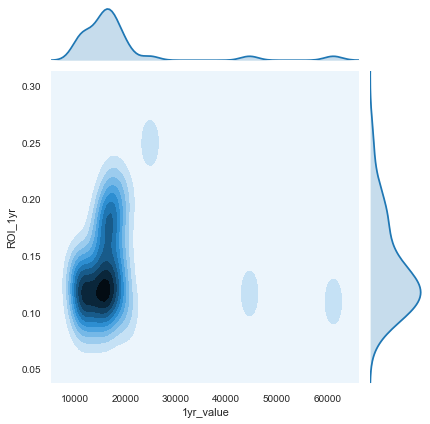

In [40]:
sns.jointplot(x=harris2["1yr_value"], y=harris2["ROI_1yr"], kind='kde')

Now I am going to plot my data so that I can see exactly where the more profitable homes in Houston are located.

In [41]:
ROI1['RegionName']=ROI1['RegionName'].astype(str)

In [42]:
#!pip install folium
import folium
map = folium.Map(location=[29.76328, -95.36327], default_zoom_start=15)

In [43]:
map.choropleth(geo_data="tx_texas_zip_codes_geo.min.json",
             data=ROI1, # my dataset
             columns=['RegionName', 'ROI_1yr'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.ZCTA5CE10', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.2, line_opacity=0.5,
             legend_name='ROI 1Yr')

In [44]:
#map

## Recommendations

* When I compared the 1-year home values that gave a return of 10%+ to the 5-year home values, I found the following stats:

A. 1 Year Breakdown @ 10% ROI:
1 Year ROI: 13.7%,
1 Year Return: $19,223

B. 5 Year Overall:
5 Year ROI: 43.3%,
5 Year Return: $66, 807

C. 5 Year Breakdown: 
8.66% Annual ROI,
$13,361 Annual Return

I broke the 5 Year overall percentages down into annual, and when you compared the ROI and overall return value between the two, 1 Year ROI of 10%+ seemed to be the best investment option of a ROI of 13.7% and a return value average of $19,223.

In conclusion, it is better to invest in 1 Year fast flips in homes that have brought in an average 10%+ return over holding onto homes for 5 Year to gain equity before selling. 


* The best areas to invest in the Houston area is Harris, Galveston, Brazoria, Chambers, and Fort Bent counties. Out of all of the counties, Harris county has the most homes in the area that have a 10%+ yearly ROI. The two areas in Harris county is the Medical Center/3rd Ward area and the Northside area. The Medical Center has a lot of potential with a high value of commuters and local medical professionals desire to live close to where they work. 3rd ward is a historical black neighborhood that has been high hard with the gentrification bug. There are a lot of businesses moving into the area and a lot of homes and neighborhoods actively being renovated. Great investment potential due to the fact that it is a high demand area that is also getting support from the Medical Center area. Northside is another area like 3rd Ward. It is a historically black neighborhood that is starting its gentrification stage. It is a little behind 3rd Ward in development but with it's location between downtown Houston and Bush International Airport, it's another great location with potential. 


* Investing in Harris county alone or allocating your investments between the other 4 counties really does not make that much of a difference. There is only a difference of 0.98% ROI increase in investing solely in Harris county and a decrease of $763 in home value returns. I recommend an allocation of investments throughout the top 5 counties over Harris county alone.